In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
data=os.listdir(r"C:/Users/Saini/Deskt
op/dataset/Training")
classes={"yes":1,"no_tumor":0}
data

SyntaxError: unterminated string literal (detected at line 7) (194363127.py, line 7)

In [7]:
classes

{'yes': 1, 'no_tumor': 0}

In [14]:
x=[]
y=[]
for cls in classes:
    path=r"C:/Users/Saini/Desktop/dataset/Training/" + cls
    for j in os.listdir(path):
        img=cv2.imread(path+"/"+j,0)
        img=cv2.resize(img,(200,200))
        x.append(img)
        y.append(classes[cls])
np.unique(y)

array([0, 1])

In [15]:
x=np.array(x)
y=np.array(y)

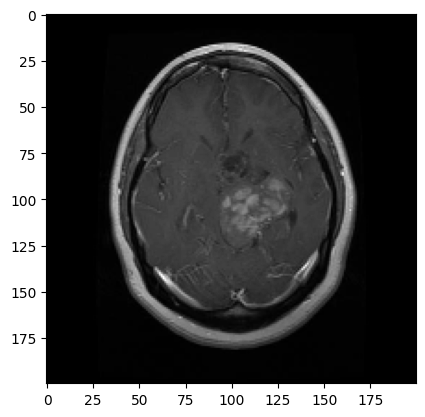

In [16]:
import matplotlib.pyplot as plt
plt.imshow(x[0],cmap="gray")
plt.show()

In [17]:
pd.Series(y).value_counts()

1    2475
0     395
Name: count, dtype: int64

In [18]:
x.shape

(2870, 200, 200)

In [19]:
updated_x=x.reshape(len(x), -1)
updated_x.shape

(2870, 40000)

In [20]:
updated_x[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [22]:
updated_x = np.array(updated_x)

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(updated_x,y,test_size=0.2,random_state=10)
x_train.shape,y_train.shape

((2296, 40000), (2296,))

In [26]:
x_test.shape,y_test.shape

((574, 40000), (574,))

In [27]:
x_train=x_train/255
x_test=x_test/255
x_train

array([[0.        , 0.        , 0.        , ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [28]:
x_test

array([[0.        , 0.        , 0.        , ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.02745098, 0.02745098, 0.02745098, ..., 0.03137255, 0.03137255,
        0.02745098],
       [0.23921569, 0.1254902 , 0.12941176, ..., 0.00784314, 0.00392157,
        0.11764706],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

Logistic Regression = 0.9320557491289199


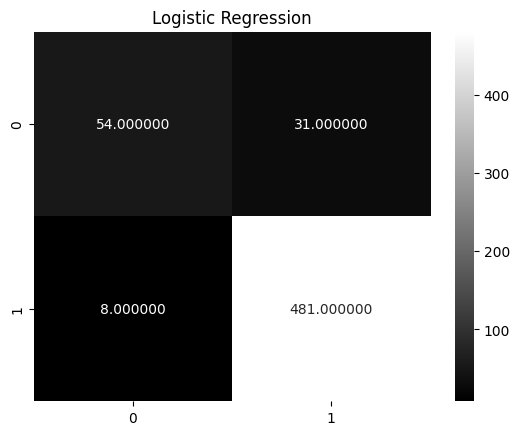

Random Forest = 0.9529616724738676


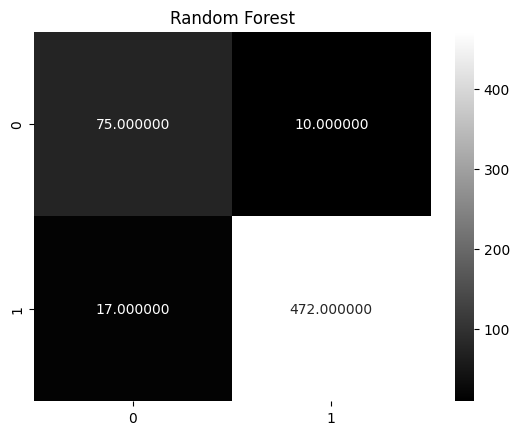

Decision Tree = 0.9320557491289199


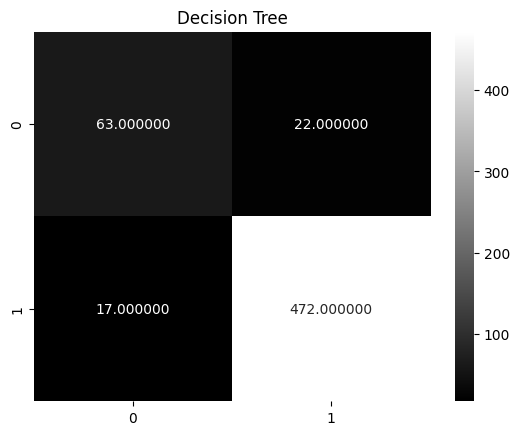

SVM = 0.9181184668989547


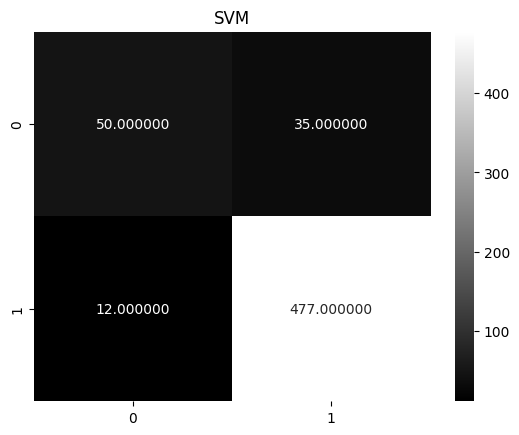

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
# Define multiple models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree":DecisionTreeClassifier(),
    "SVM": SVC()
}
for model_name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"{model_name} = {accuracy_score(y_test, y_pred)}")  
    
    confusion_mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(confusion_mat, annot=True, fmt="2f", cmap="gray")
    plt.title(f"{model_name}")
    plt.show()

In [31]:
random_forest_model=RandomForestClassifier()
random_forest_model.fit(x_train,y_train)

RandomForestClassifier()

In [34]:
print(f"Training Accuracy{random_forest_model.score(x_train,y_train)}")
print(f"Testing Accuracy{random_forest_model.score(x_test,y_test)}")

Training Accuracy1.0
Testing Accuracy0.9529616724738676


In [37]:
import joblib
joblib.dump(random_forest_model,"Br̥ain_tumor.joblib")

['Br̥ain_tumor.joblib']

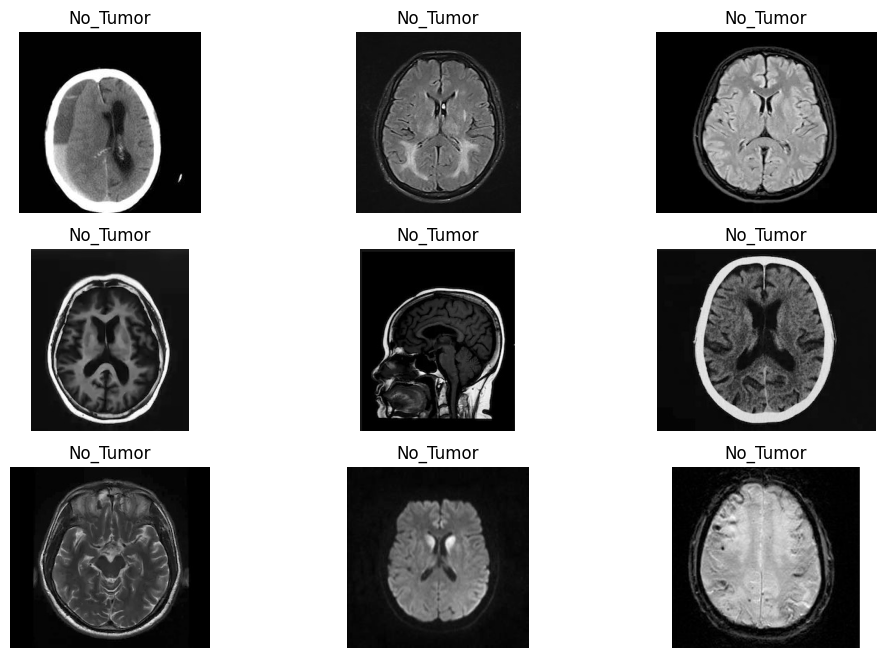

In [46]:
desc={1:"Positive_Tumor",0:"No_Tumor"}
new_img=os.listdir("C:/Users/Saini/Desktop/dataset/Testing/no_tumor/")
plt.figure(figsize=(12,8))
c=1
for i in os.listdir("C:/Users/Saini/Desktop/dataset/Testing/no_tumor/")[:9]:
    plt.subplot(3,3,c)
    img=cv2.imread("C:/Users/Saini/Desktop/dataset/Testing/no_tumor/"+i,0)
    img1=cv2.resize(img, (200,200))
    img1=img1.reshape(1,-1)/255
    p=random_forest_model.predict(img1)
    plt.title(desc[p[0]])
    plt.imshow(img,cmap="gray")
    plt.axis("off")
    c += 1
   

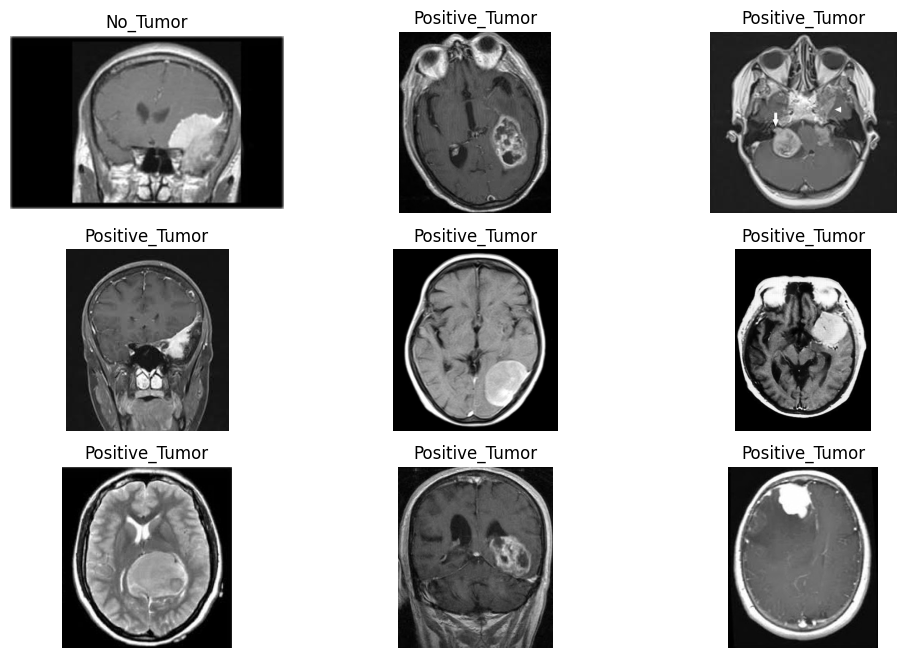

In [47]:
desc={1:"Positive_Tumor",0:"No_Tumor"}
new_img=os.listdir("C:/Users/Saini/Desktop/dataset/Testing/meningioma_tumor/")
plt.figure(figsize=(12,8))
c=1
for i in os.listdir("C:/Users/Saini/Desktop/dataset/Testing/meningioma_tumor/")[:9]:
    plt.subplot(3,3,c)
    img=cv2.imread("C:/Users/Saini/Desktop/dataset/Testing/meningioma_tumor/"+i,0)
    img1=cv2.resize(img, (200,200))
    img1=img1.reshape(1,-1)/255
    p=random_forest_model.predict(img1)
    plt.title(desc[p[0]])
    plt.imshow(img,cmap="gray")
    plt.axis("off")
    c += 1
   